# **I. Introduction**

<p>=================================================<br>

**Data Scientist Technical Test in PT. Pemeringkat Efek Indonesia (PT. PEFINDO)**

**Name**: Maulana Yusuf Taufiqurrahman<br>
**From**: Hacktiv8 Full Time Data Science (FTDS) - HCK Batch 026 - Alumni

<p>=================================================<br>

# **II. Import Library Packages**

The most important things to do for programming by using Python is importing the library packages, especially in this project. We need to import the packages starts from **Pandas**, **NumPy**, **Sci-Kit Learn**, **Seaborn**, and so on. If we need to import another packages, just add another packages in the **`II. Import Library Packages`** section.

In [11]:
# Data Analysis Packages
import pandas as pd
import numpy as np

# Visualization Tools
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Packages
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

# SHAP Package
import shap

# **III. Data Loading**

### **A. Load the Dataset**

Load the dataset is important to make sure the dataset is able to read and get to know what this data contains about it.

In [2]:
# Read the csv file
df_org = pd.read_csv('./data/credit_scoring.csv')

# Create a copy
df_copy = df_org.copy()

# Combining into a dataframe
combined_df_copy = pd.concat([df_copy.iloc[:10], df_copy.iloc[-10:]], ignore_index=True)

# Show the dataset
combined_df_copy

,application_id,age,monthly_income,loan_amount,previous_defaults,credit_score,default,leak_col_good,leak_col_subtle
0,501000,41,13995609,5982664,0,624,0,0,-0.040
1,501001,58,13683833,3711198,0,809,0,0,0.001
2,501002,33,9417391,7172332,0,647,0,0,0.077
3,501003,45,6861811,8661056,0,450,0,0,0.038
4,501004,22,5640742,4520669,1,816,0,0,0.020
5,501005,22,7783669,13057356,1,642,0,0,0.004
6,501006,22,15252800,4009613,1,515,0,0,-0.033
7,501007,35,17437764,3871786,0,807,0,0,0.061
8,501008,35,12499029,13703265,0,636,0,0,0.083
9,501009,38,11650601,12664024,0,422,0,0,0.033


The dataset is successfully been loaded. In this case, it shows only **20 data** to make sure the data is showed. The further information about the data will be explain more.

### **B. Summary of the Dataset**

By seeing the information of the dataset, we can get the insights from it such as what we want to drop a/some unecessary column/s. It is one of the actions that must be taken to analyze data.

In [3]:
# Show the information of the dataset
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   application_id     6000 non-null   int64  
 1   age                6000 non-null   int64  
 2   monthly_income     6000 non-null   int64  
 3   loan_amount        6000 non-null   int64  
 4   previous_defaults  6000 non-null   int64  
 5   credit_score       6000 non-null   int64  
 6   default            6000 non-null   int64  
 7   leak_col_good      6000 non-null   int64  
 8   leak_col_subtle    6000 non-null   float64
dtypes: float64(1), int64(8)
memory usage: 422.0 KB


**`Summary of the dataset`**:
- **9** column names.
- **6000** values with **NO** missing values.
- **2** types of data: **float** and **int**.<p>

From this information, we can know which one is for the **Target** and to be **Split**.

### **C. Check the Missing Values**

In [6]:
# Check the missing values
df_copy.isnull().sum()

application_id       0
age                  0
monthly_income       0
loan_amount          0
previous_defaults    0
credit_score         0
default              0
leak_col_good        0
leak_col_subtle      0
dtype: int64

### **D. Check the Duplicates**

In [7]:
# Check the missing values
df_copy.duplicated().sum()

0

### **E. Check the Cardinality**

In [8]:
# Check the cardinality
df_copy.nunique()

application_id       6000
age                    39
monthly_income       6000
loan_amount          6000
previous_defaults       4
credit_score          550
default                 2
leak_col_good           2
leak_col_subtle       239
dtype: int64

### **F. Check the Skewness**

In [9]:
# Take numerical columns only
numerical_cols = df_copy.select_dtypes(include = [np.number]).columns

# Count the skewness
skewness = df_copy[numerical_cols].skew()

# Create a def function
def interpret_skew(val):
    if val > 0.5:
        return 'Right Skewed'
    elif val < -0.5:
        return 'Left Skewed'
    else:
        return 'Approximately Normal'

# Create a dataframe
skewness_df = pd.DataFrame({
    'Skewness': skewness,
    'Interpretation': skewness.apply(interpret_skew)
})

# Show the output
print(skewness_df)

                   Skewness        Interpretation
application_id     0.000000  Approximately Normal
age               -0.050049  Approximately Normal
monthly_income     0.018512  Approximately Normal
loan_amount        0.000769  Approximately Normal
previous_defaults  1.874568          Right Skewed
credit_score      -0.017558  Approximately Normal
default            8.901894          Right Skewed
leak_col_good      8.901894          Right Skewed
leak_col_subtle    7.981180          Right Skewed


Most of the numerical columns are **approximately normal**. The rest of them are 4 columns having High Skewed (tends to the right).<p>
But, the **`leak_col_good`** and **`leak_col_subtle`** will be dropped and **`default`** will be the **target**, so there will be only **one** column that High Skewed, which is **`previous_default`** by treat as category.

### **G. Drop an unrelated column**

In [10]:
# Drop application_id column
df_copy.drop(columns = ['application_id'], inplace = True)

# Check the latest columns
df_copy.columns

Index(['age', 'monthly_income', 'loan_amount', 'previous_defaults',
       'credit_score', 'default', 'leak_col_good', 'leak_col_subtle'],
      dtype='object')

# **IV. Exploratory Data Analysis (EDA)**

### **A. Distribution of Target Variable**

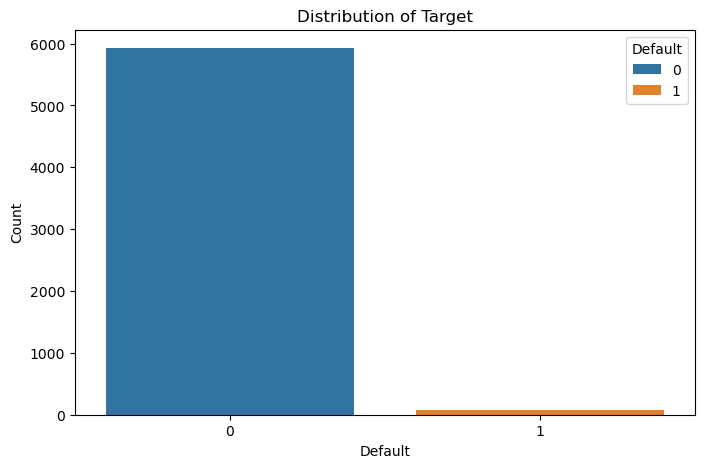

In [ ]:
# Create the visualization
plt.figure(figsize = (8, 5))
sns.countplot(x = 'default', data = df_copy, hue = 'default')

# Add title and labels
plt.title('Distribution of Target')
plt.xlabel('Default')
plt.ylabel('Count')

# Add legend
plt.legend(title = 'Default')

# Show the visualization
plt.show()

### **B. Distribution of Numeric Feature**

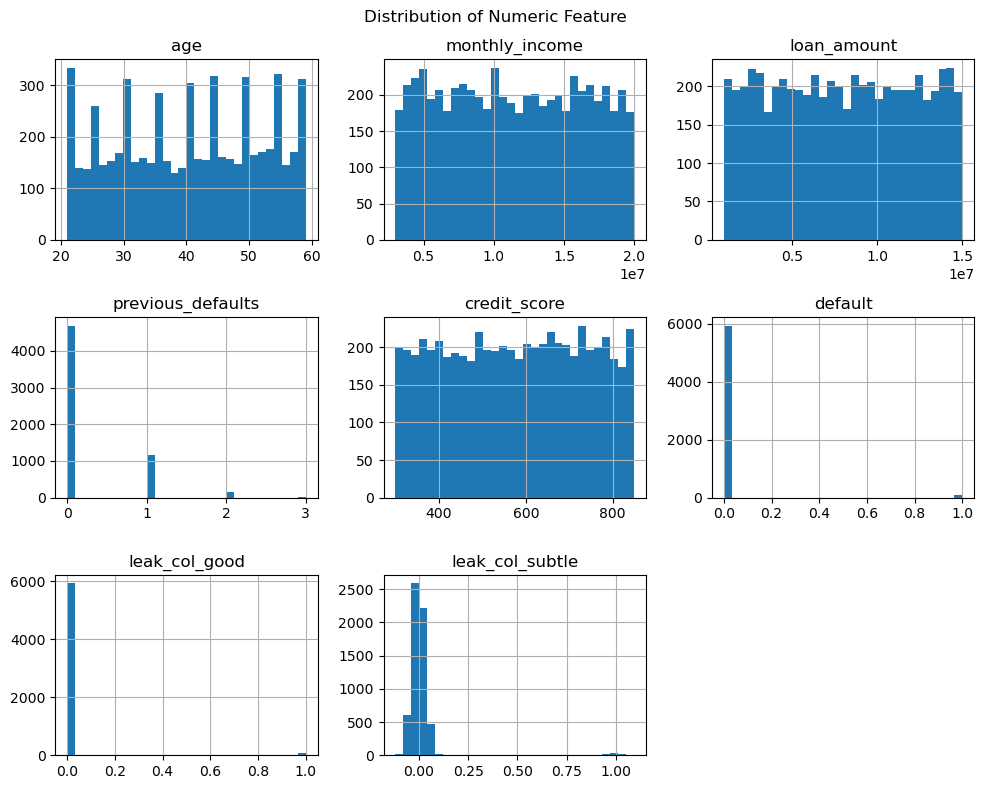

In [22]:
# Create the visualization
df_copy.hist(bins = 30, figsize = (10, 8))

# Add title and layout
plt.suptitle('Distribution of Numeric Feature')
plt.tight_layout()

# Show the visualization
plt.show()

### **C. Correlation between Features**

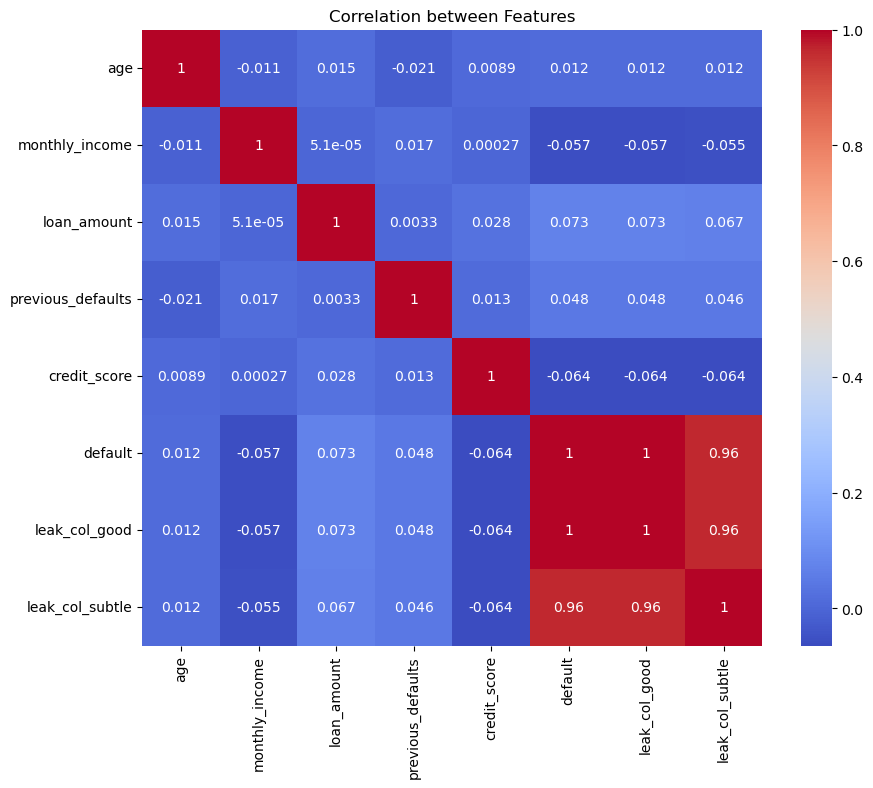

In [23]:
# Create correlation variable
corr = df_copy.corr()

# Create the visualization
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Add title and show the visualization
plt.title('Correlation between Features')
plt.show()

### **D. Analyzing the Outliers**

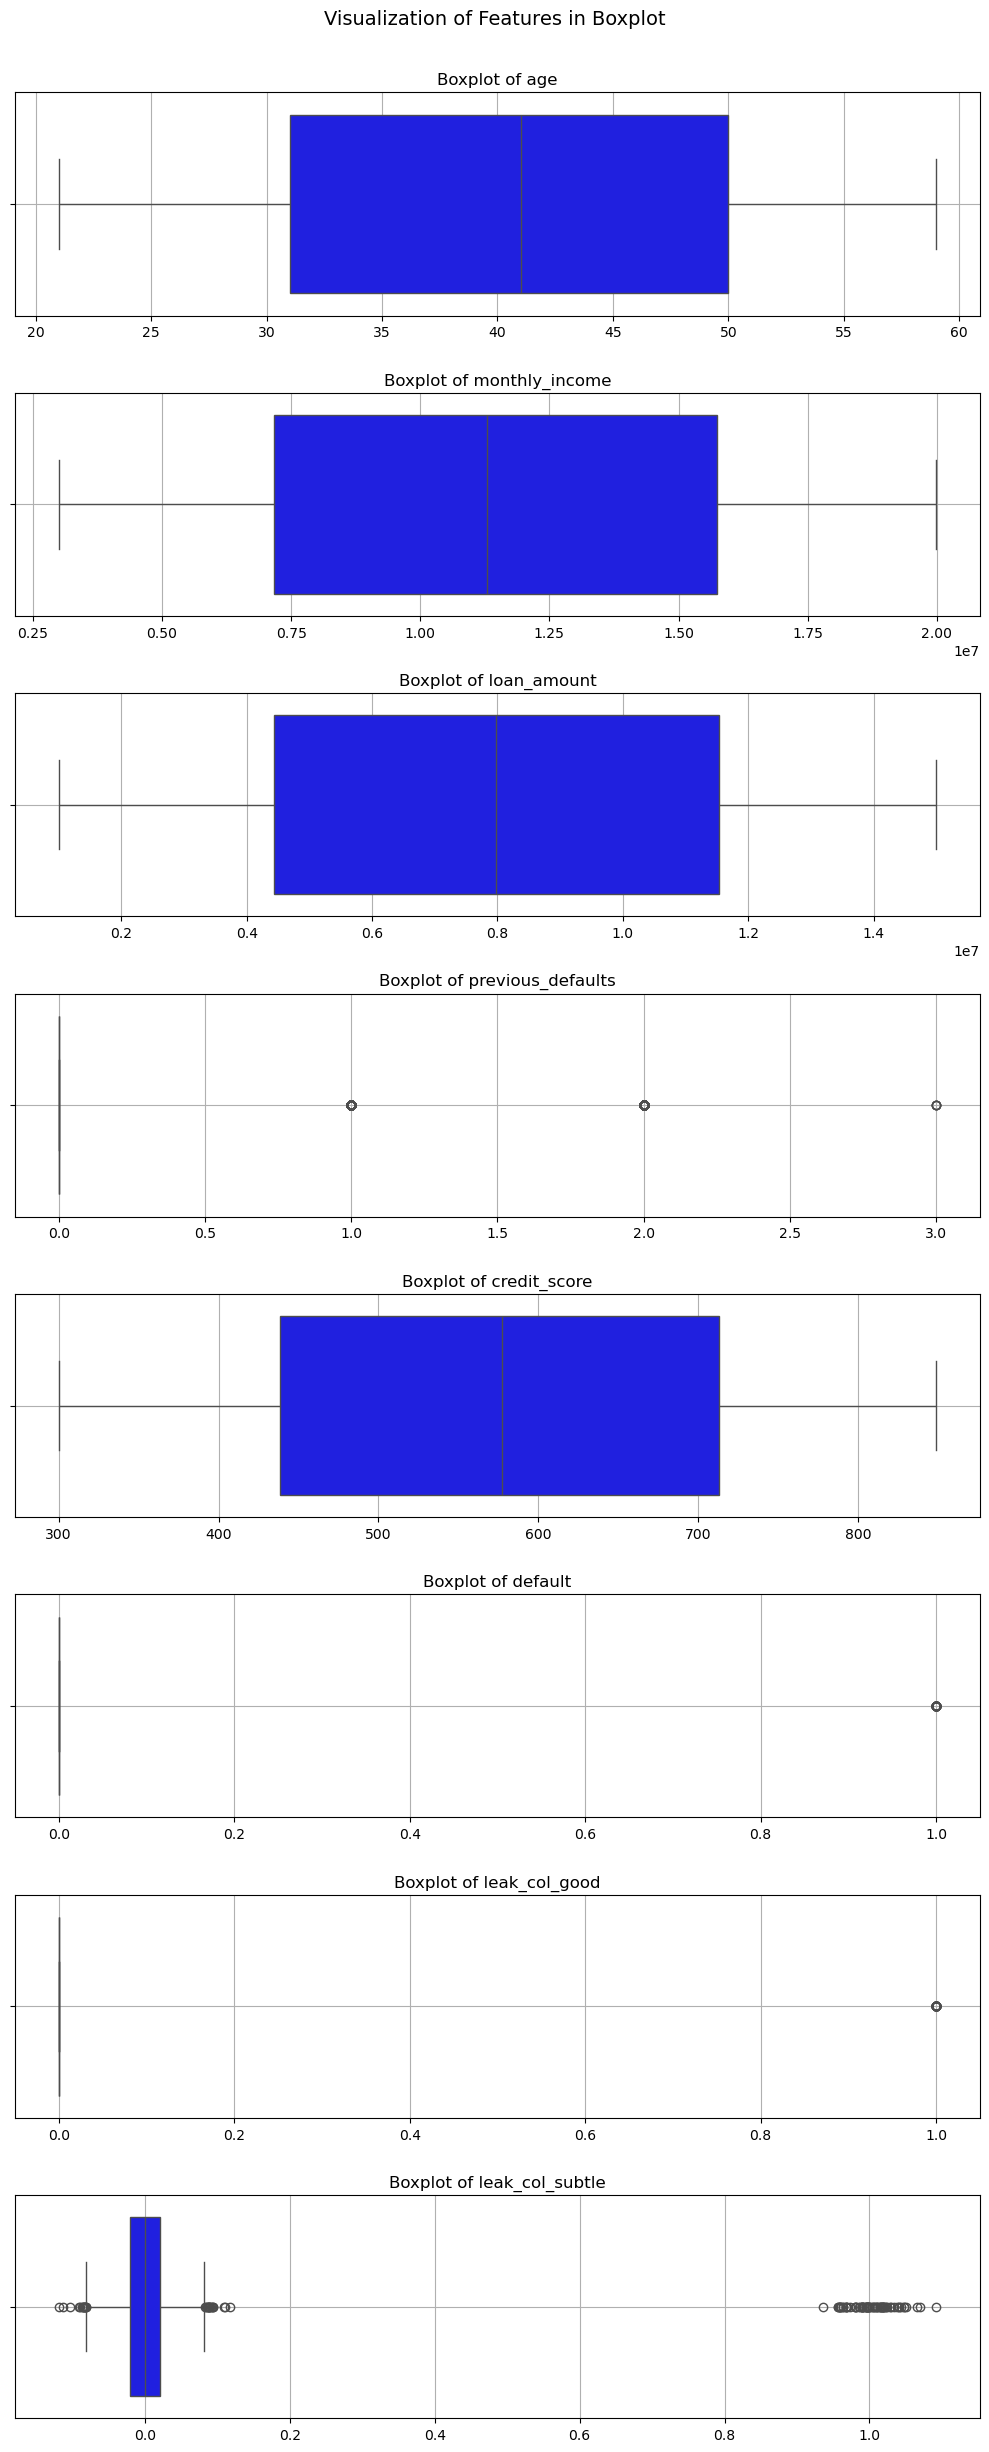

In [ ]:
# Take numerical columns
numerical_cols = df_copy.select_dtypes(include='number').columns

# Create the visualization
plt.figure(figsize=(10, 3 * len(numerical_cols)))

# Create for loop for visualization
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(data = df_copy[col], orient = 'h', color = 'blue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
    plt.grid(True)

# Add title and show the visualization
plt.tight_layout()
plt.suptitle('Visualization of Features in Boxplot', fontsize = 14, y = 1.02)
plt.show()

### **E. Correlation between Numeric and Target**

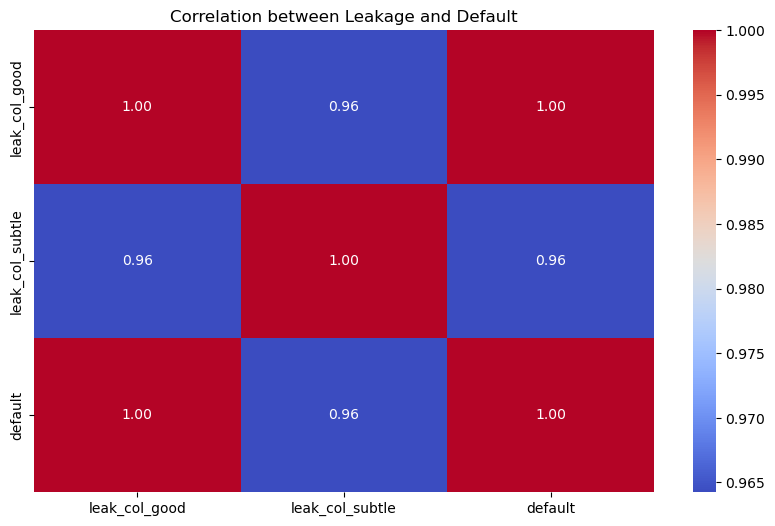

In [ ]:
# Correlation between numeric dengan target
corr_matrix = df_copy[['leak_col_good', 'leak_col_subtle', 'default']].corr()

# Create the visualization
plt.figure(figsize = (10, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')

# Add title and show the visualization
plt.title('Correlation between Leakage and Default')
plt.show()

# **V. Feature Engineering**

### **A. Drop the leakage columns**

In [32]:
# Drop application_id column
df_copy.drop(columns = ['leak_col_good', 'leak_col_subtle'], inplace = True)

# Check the latest columns
df_copy.columns

Index(['age', 'monthly_income', 'loan_amount', 'previous_defaults',
       'credit_score', 'default'],
      dtype='object')

In [ ]:
# Show the latest info
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                6000 non-null   int64
 1   monthly_income     6000 non-null   int64
 2   loan_amount        6000 non-null   int64
 3   previous_defaults  6000 non-null   int64
 4   credit_score       6000 non-null   int64
 5   default            6000 non-null   int64
dtypes: int64(6)
memory usage: 281.4 KB


### **B. Split between X (Features) and Y (Target)**

In [34]:
# Splitting Features and Target
X = df_copy.drop(['default'], axis = 1)
y = df_copy['default']

# Show the output
X

,age,monthly_income,loan_amount,previous_defaults,credit_score
0,41,13995609,5982664,0,624
1,58,13683833,3711198,0,809
2,33,9417391,7172332,0,647
3,45,6861811,8661056,0,450
4,22,5640742,4520669,1,816
...,...,...,...,...,...
5995,26,18253018,3690565,2,729
5996,40,9944385,4082038,1,477
5997,28,9048532,14760384,0,450
5998,51,6843160,11774594,0,561


### **C. Split between Train Set and Test Set**

In [35]:
# Splitting Training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

# Show the output
print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (4800, 5)
Test Size :  (1200, 5)


### **D. Feature Scaling**

In [ ]:
# Initializing the scaler
scaler = StandardScaler()

# Fit and transform for training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform for test set only
X_test_scaled = scaler.transform(X_test)

# Create into a DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns, index = X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns, index = X_test.index)

# Show the output
print(X_train_scaled.head())

           age  monthly_income  loan_amount  previous_defaults  credit_score
4408  1.649881       -1.704900     0.710930          -0.506819     -0.620413
3654 -0.204021        1.696014     0.333063          -0.506819     -1.234544
4995 -0.645426       -0.184458     0.365161          -0.506819      0.126674
5783  1.561600       -0.470044    -0.984305          -0.506819      1.158667
2351  0.678789        1.104426    -0.241442          -0.506819      0.449567


# **VI. Modeling**

### **A. Model Training**

In [41]:
# Create Model Training using Logistic Regression
logreg = LogisticRegression(max_iter = 1000, class_weight='balanced', random_state = 25)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=25)

### **B. Model Evaluation**

In [42]:
# Predict
y_pred = logreg.predict(X_test_scaled)
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

# Show the Classification Report
print(f'Logistic Regression Model Performance:')
print(classification_report(y_test, y_pred))
print(f'ROC-AUC Score: {roc_auc_score(y_test, y_proba):.3f}')

Logistic Regression Model Performance:
              precision    recall  f1-score   support

           0       1.00      0.72      0.84      1188
           1       0.03      0.83      0.06        12

    accuracy                           0.72      1200
   macro avg       0.51      0.78      0.45      1200
weighted avg       0.99      0.72      0.83      1200

ROC-AUC Score: 0.819
